## Constructing quadrature rules of maximal polynomial degree, given the sample points


In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

m = 2
open Newton-Cotes  x =  [-1/2 0 1/2]

alpha = (2/3, -1/3, 2/3)

quadrature rule          has polynomial degree m   = 2 by construction
quadrature rule actually has polynomial degree m+1 = 3?  True
quadrature rule actually has polynomial degree m+2 = 4?  False


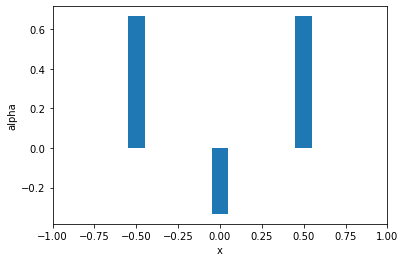

In [8]:
a,b = -1,1
m = 2

#x = np.array([a+j*sp.Rational(b-a,m) for j in range(m+1)]); name = 'closed Newton-Cotes'

x = np.array([a+j*sp.Rational(b-a,m+2) for j in list(range(m+3))[1:-1]]); name = 'open Newton-Cotes'

#x = np.array()

print(f'm = {m}')
print(name,' x = ',x)

A = np.array(sp.ones(m+1,m+1))  # matrix of coefficients of the alphas
for j in range(1,m+1):
    A[j,:] = A[j-1,:]*x
A*=(b-a)
A = sp.Matrix(A)

exact_integrals = [ sp.Rational((b**j-a**j),j) for j in range(1,m+2)]  
exact_integrals = sp.Matrix([exact_integrals]).T

alpha = list(sp.linsolve([A,exact_integrals]))[0]  # solve the linear system for the weights
print('\nalpha =',alpha)

plt.bar(x,alpha,width=(b-a)/(m+2)/5,clip_on=False)
plt.ylabel('alpha'); plt.xlabel('x')
plt.xlim(a,b)
print(f'\nquadrature rule          has polynomial degree m   = {m} by construction')
# check for higher than expected degree
j = m+1
while True:
    jp1 = j+1
    exact_integral =  sp.Rational( b**jp1-a**jp1, jp1 )  #of x**j 
    quadrature = (b-a)*sum( x**j*alpha )
    print(f'quadrature rule actually has polynomial degree m+{j-m} = {j}? ',quadrature==exact_integral)
    if quadrature!=exact_integral: break
    j += 1

## Let's test the 2-point Gaussian quadrature rule we just derived
(to integrate a non-polynomial function)

In [ ]:
from numpy import sqrt, exp

In [ ]:
def G2(f):
    return f(-1/sqrt(3)) + f(1/sqrt(3))

def T(f):
    return f(-1) + f(1)

myf = exp         # here is the function we want to integrate

e = exp(1)
exact = e - 1/e

gauss_approx = G2(myf)
trap_approx  = T(myf)

gauss_error = (gauss_approx-exact)/exact
trap_error  = (trap_approx -exact)/exact

print(trap_error)

In [ ]:
print(gauss_error)

### Gauss is 100 times better than Trapezoid in this example.

## Let's test the 7,15-point Gauss-Kronrod pair of rules

In [9]:
from numpy import *

# nodes and weights for the interval [-1,1] copied-and-pasted from Wikipedia

knodes = array([
-0.9914553711208126392, 
-0.9491079123427585245, 
-0.8648644233597690728, 
-0.7415311855993944399, 
-0.5860872354676911303, 
-0.4058451513773971669, 
-0.2077849550078984676, 
 0., 
 0.2077849550078984676, 
 0.4058451513773971669, 
 0.5860872354676911303,  
 0.7415311855993944399, 
 0.8648644233597690728, 
 0.9491079123427585245, 
 0.9914553711208126392])

gnodes = knodes[1::2]

kweights = array([
0.022935322010529224964, 
0.06309209262997855329, 
0.10479001032225018384, 
0.14065325971552591875, 
0.16900472663926790283, 
0.1903505780647854099, 
0.20443294007529889241, 
0.2094821410847278280, 
0.20443294007529889241, 
0.1903505780647854099, 
0.16900472663926790283, 
0.14065325971552591875, 
0.10479001032225018384, 
0.06309209262997855329, 
0.022935322010529224964]) 

gweights = array([
0.12948496616886969327061143267908201832858740225995, \
0.2797053914892766679014677714237795824869250652266,  \
0.3818300505051189449503697754889751338783650835339,  \
0.4179591836734693877551020408163265306122448979592,  \
0.3818300505051189449503697754889751338783650835339,  \
0.2797053914892766679014677714237795824869250652266,  \
0.1294849661688696932706114326790820183285874022599   ])

def g7(f,a,b):
    global gnodes,gweights
    center = (a+b)/2.
    halfwidth = (b-a)/2.
    nodes = center + halfwidth*gnodes
    weights = halfwidth*gweights
    return dot( weights, f(nodes) )

def k15(f,a,b):
    global knodes,kweights
    center = (a+b)/2.
    halfwidth = (b-a)/2.
    nodes = center + halfwidth*knodes
    weights = halfwidth*kweights
    return dot( weights, f(nodes) )

# test them
def myf(x): return  sin(x) #x**10
def myF(x): return -cos(x) # for this example we can provide an antiderivative to obtain the integral exactly

a,b = 2,5  # randomly chosen interval

exact = myF(b) - myF(a)
print( 'Exact     :',exact )

Gest  = g7(myf,a,b)
print( "Gauss 7   :", Gest, ', error:', abs(Gest-exact)/exact )

Kest  = k15(myf,a,b)
print( "Kronrod 15:", Kest, ', error:', abs(Kest-exact)/exact )




Exact     : -0.6998090220103687
Gauss 7   : -0.6998090220106843 , error: -4.510322044637135e-13
Kronrod 15: -0.6998090220103687 , error: -0.0


## Adaptive quadrature with G7K15

exact  0.896902014293353
approx 0.8969020142933529 , error estimate 2.647744277426301e-12
actual error -1.1102230246251565e-16


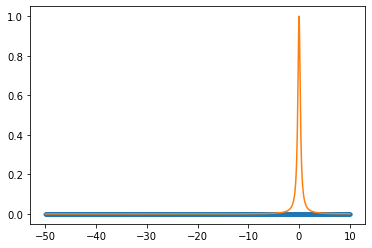

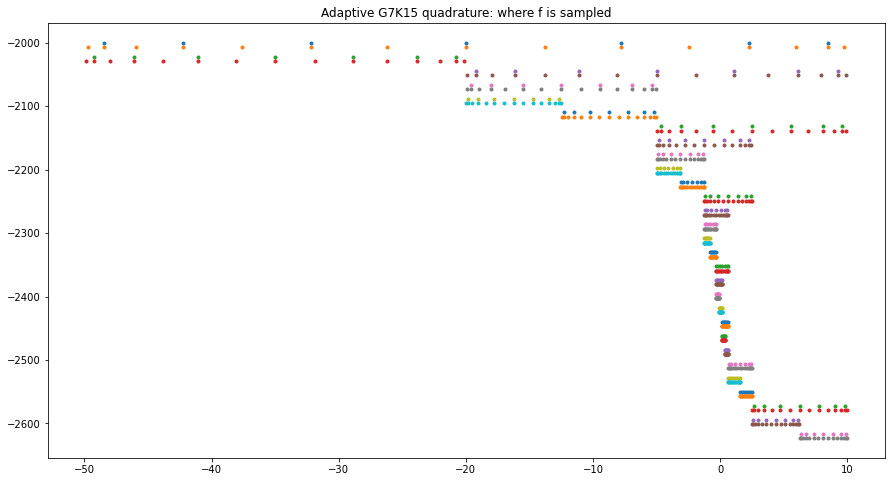

In [10]:
import numpy as np
from gk import g7,k15
import matplotlib.pyplot as plt

count = 0

def runge(x):
    global count
    plt.plot(x,-count*np.ones_like(x),'.')   # plot the points where we've been asked to evaluate the function
    count += len(x)
    return 1/(1+12*x**2)

f = runge

def F(x):  # antiderivative of Runge
    s = np.sqrt(12)
    return np.arctan(s*x)/s

def quad( f, a, b ):
    g = g7 ( f, a, b )
    k = k15( f, a, b )
    error_estimate = 200*abs(g-k)**1.5
    return k, error_estimate

def adaptive( f, a, b, tol ):
    i,e = quad( f, a, b )
    if e <= tol:
        return i, e
    else:
        midpt = (a+b)/2
        i1, e1 = adaptive( f, a    , midpt, tol/2 )
        i2, e2 = adaptive( f, midpt, b    , tol/2 )
        return i1+i2, e1+e2

a = -50
b =  10
exact = F(b) - F(a)
xx = linspace(a,b,2000); plt.figure(); plt.plot(xx,f(xx))
print( "exact ", exact )
plt.figure(figsize=(15,8))
i,e = adaptive( f, a, b, 1e-10 )
print( "approx", i, ", error estimate", e )
print( "actual error", i-exact )

plt.title('Adaptive G7K15 quadrature: where f is sampled')
plt.savefig('temp.pdf')


## "How is it that the Gaussian rules are so remarkably accurate for non-polynomial functions?"

Consider the 2-point (m=1) Gaussian rule. There is a unique polynomial of degree 1 or less that interpolates the sampled values of the function $f$ for which we want to evaluate $\int_{-1}^{1}$. 

But there is an entire 2D family of functions within $P_3$
that interpolate the data, and if we choose the Gaussian sample points they all have the same integral
(because we know the 2-point Gauss rule gets the integral exactly for all $p \in P_3$).

Thus there is an entire 2D family of interpolating cubics with the same integral, and it is plausible that some of them approximate $f$ quite well, yielding an accurate approximation of its integral. Illustration below.

Derive a parametrization of 2D subset of $P_3$ where the 2-point interpolation conditions are satisfied:

In [16]:
x1 = sp.symbols('x_1')
y0,y1 = sp.symbols('y_0,y_1')
a = sp.symbols('a_0:4')
x0 = -x1
# interpolation conditions
eq0 = sum([x0**j*a[j] for j in range(4)]) - y0
eq1 = sum([x1**j*a[j] for j in range(4)]) - y1
display(eq0)
display(eq1)
# let the family be parametrized by the quadratic and cubic coeffs a_2, a_3
sol = sp.solve((eq0,eq1),(a[0],a[1]))
display(a[0])
display(sol[a[0]])
display(a[1])
display(sol[a[1]])

a_0 - a_1*x_1 + a_2*x_1**2 - a_3*x_1**3 - y_0

a_0 + a_1*x_1 + a_2*x_1**2 + a_3*x_1**3 - y_1

a_0

-a_2*x_1**2 + y_0/2 + y_1/2

a_1

(-2*a_3*x_1**3 - y_0 + y_1)/(2*x_1)

1.5370444850869225
1.5370444850869225
1.5370444850869225
1.537044485086922
1.5370444850869218
1.5370444850869218
1.5370444850869223
1.537044485086922
1.5370444850869218
1.5370444850869218
1.537044485086922
1.537044485086922


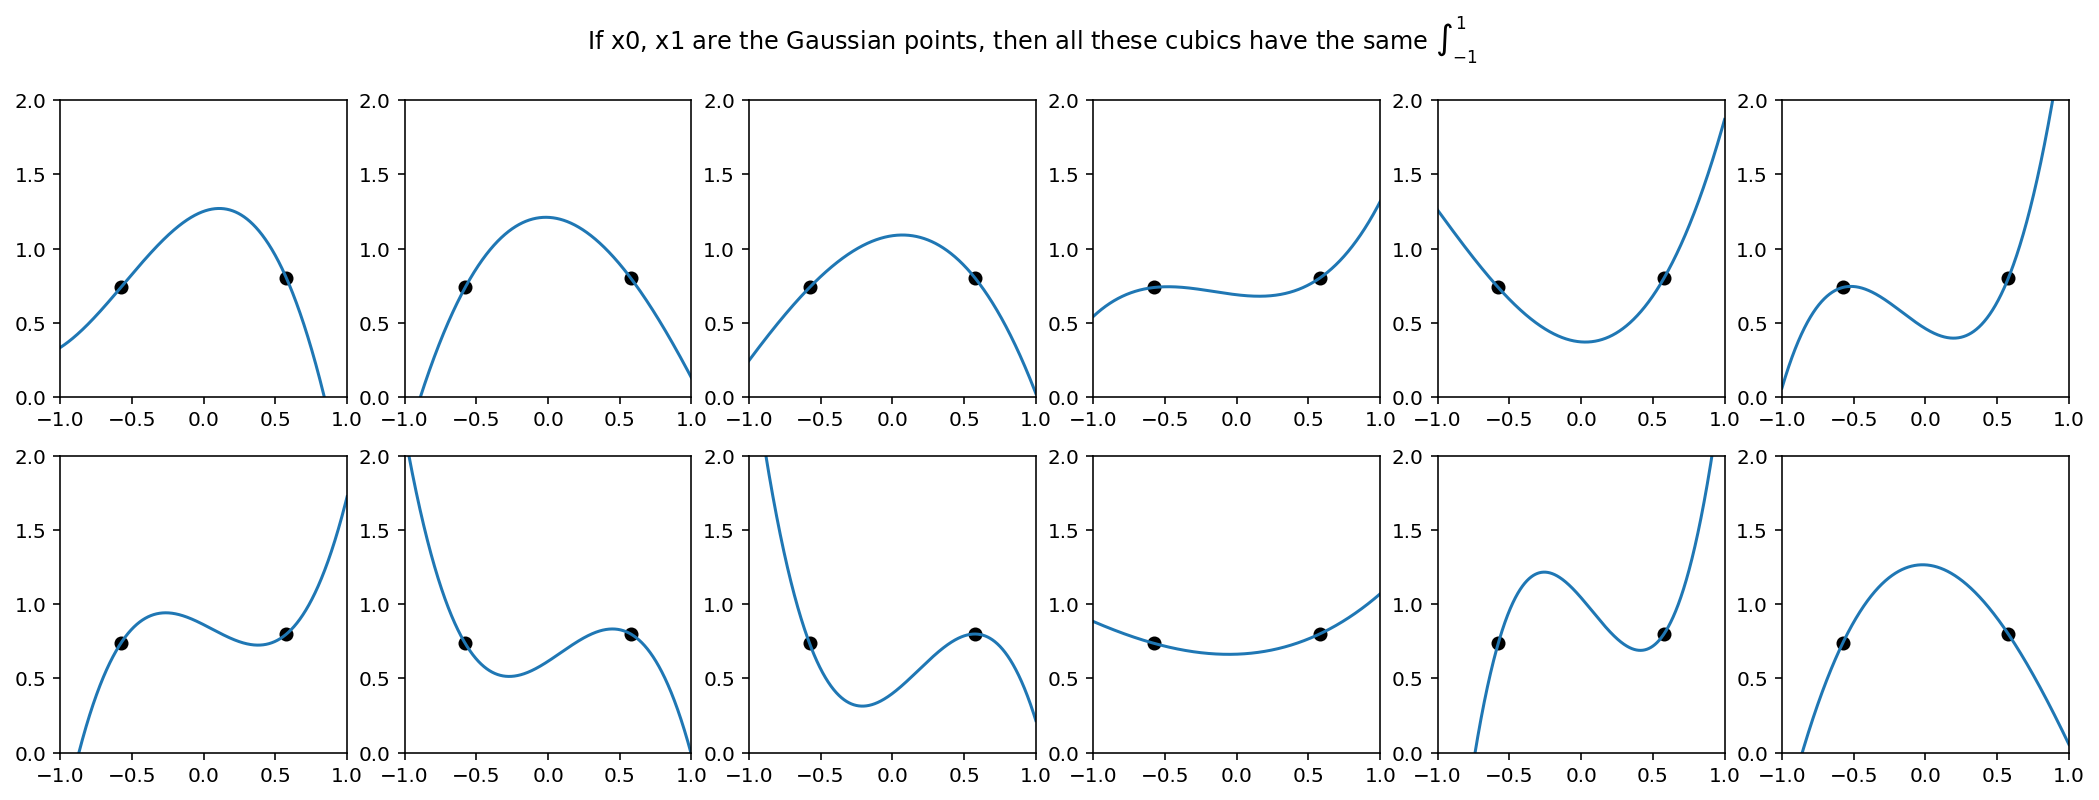

In [32]:
%config InlineBackend.figure_format = 'retina'
x1 = 1/np.sqrt(3)  # Gaussian sample point (try anything else and the integral will vary)
x0 = -x1

x = np.array([x0,x1])
y = np.random.rand(len(x))


b0 = np.array([(y[0]+y[1])/2,
              (y[1]-y[0])/2/x[1],
              0,
              0])
b1 = np.array([-x[1]**2,0,1,0])
b2 = np.array([0, -x[1]**2, 0, 1])

def p(a,x):
    return np.sum([a[j]*x**j for j in range(len(a))],axis=0)

def intp(a): # exact integral over [-1,1]
    return sum([a[j]*( 1)**(j+1)/(j+1) for j in range(len(a))]) \
          -sum([a[j]*(-1)**(j+1)/(j+1) for j in range(len(a))])

xx = np.linspace(-1,1,5000)
nr,nc = 2,6
plt.figure(figsize=(nc*3,nr*3))
for k in range(nr*nc):
    plt.subplot(nr,nc,k+1)
    plt.plot(x,y,'ko')
    c = np.random.randn(2)
    a = b0 + c[0]*b1 + c[1]*b2  # coefficients of an interpolating cubic
    plt.plot(xx,p(a,xx))
    exact_integral= intp(a)
    print(exact_integral)
    plt.xlim(-1,1); plt.ylim(0,2)
plt.suptitle('If x0, x1 are the Gaussian points, then all these cubics have the same $\int_{-1}^{1}$')
plt.savefig('temp.pdf')